In [3]:
import pandas as pd
import numpy as np
import quandl as qdl
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [4]:
api = qdl.ApiConfig.api_key = 'your key'

In [7]:
start = '2000-1-1'
end = '2020-1-1'
msft=qdl.get('EOD/MSFT',start_date=start,end_date=end)

In [9]:
fig = go.Figure(data=[go.Candlestick(x=msft.index,
                                     open = msft['Open'],
                                     high = msft['High'],
                                     low = msft['Low'],
                                     close = msft['Close'])])


In [25]:
# Viewing short window
w_start = 100
w_size = 100
sd = msft[w_start:w_start+w_size]
fig = go.Figure(data = go.Candlestick(x=sd.index,
                                      open = sd['Open'],
                                      high = sd['High'],
                                     low = sd['Low'],
                                     close = sd['Close']))
fig.show()

In [20]:
# why candle stick plot is better than line plot?

#ANSWER: they provide us information about close, high, open, low prices of stock
#        they also show the difference in the prices in precious close and today's open

window_size = 10

#calculation of oving average by rolling mean
rolling_mean = msft['Close'].rolling(window_size).mean()
rolling_std = msft['Close'].rolling(window_size).std()

#adding new column to hold values of upper and lower bollinger bands
msft['Rolling Mean'] = rolling_mean
msft['Bollinger High'] = rolling_mean + (rolling_std*1.5)
msft['Bollinger Low'] = rolling_mean - (rolling_std*1.5)


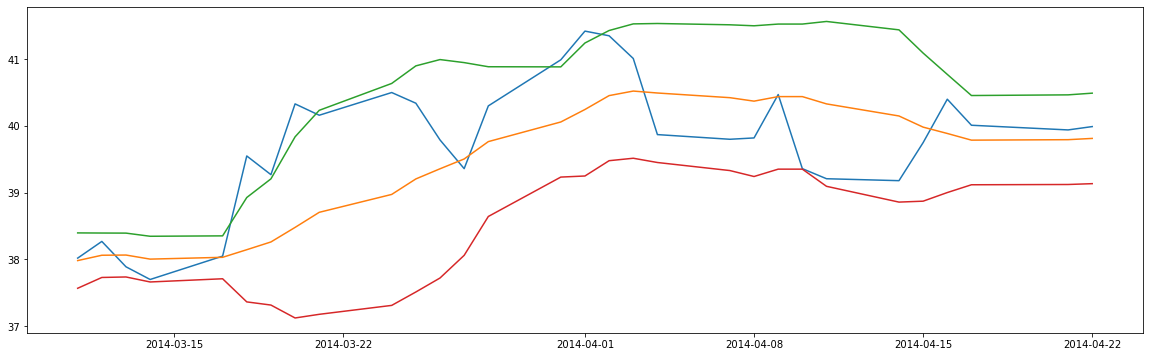

In [34]:
w_start = 130
w_size = 30
sd = msft[w_start:w_start + w_size]
fig = go.Figure(data = [go.Candlestick(x = sd.index,
                                      open = sd['Open'],
                                      close = sd['Close'],
                                      high = sd['High'],
                                     low = sd['Low'])])


plt.figure(figsize=(20,6))
plt.plot(sd['Close'],)
plt.plot(sd['Rolling Mean'])
plt.plot(sd['Bollinger High'])
plt.plot(sd['Bollinger Low'])
plt.show()

In [37]:
                                                      # BUILDING STRATEGY
msft['Signal'] = None
msft['Position'] = None

mode = 'neutral'
for index in range(len(msft)):
    if index == 0:
        continue
        
row = msft.iloc[index]
prev_row = msft.iloc[index - 1]

## Entering Long position

if mode == 'neutral' and row['Close'] < row['Bollinger Low'] and prev_row['Close'] > prev_row['Bollinger Low']:
    msft.iloc[index , msft.columns.get_loc('Signal')] = 1
    msft.iloc[index , msft.columns.get_loc('Position')] = 1
    mode = 'long'
    
## Entering Short position
    
elif mode == 'neutral' and row['Close'] > row['Bollinger High'] and prev_row['Close'] < prev_row['Bollinger High']:
    msft.iloc[index , msft.columns.get_loc('Signal')] = -1
    msft.iloc[index , msft.columns.get_loc('Position')] = -1
    
## Exciting long position

elif mode == 'long' and row['Close'] > row['Bollinger High']:
    msft.iloc[index , msft.columns.get_loc('Signal')] = -1
    msft.iloc[index , msft.columns.get_loc('Position')] = 0
    mode = 'neutral'
    
## Exciting Short position

elif mode == 'short' and row['Close'] < row['Bollinger Low']:
    msft.iloc[index , msft.columns.get_loc('Signal')] = 1
    msft.iloc[index , msft.columns.get_loc('Position')] = 0
    
## If no signal is generated; retaining the previous position

else:
    msft.iloc[index , msft.columns.get_loc('Position')] = msft.iloc[index-1,msft.columns.get_loc('Position')]

In [45]:
print(sd.head())

              Open    High      Low  Close      Volume  Dividend  Split  \
Date                                                                      
2014-03-11  37.870  38.230  37.7200  38.02  25216400.0       0.0    1.0   
2014-03-12  37.800  38.430  37.7900  38.27  30494100.0       0.0    1.0   
2014-03-13  38.420  38.450  37.6414  37.89  32169700.0       0.0    1.0   
2014-03-14  37.651  38.135  37.5058  37.70  27195600.0       0.0    1.0   
2014-03-17  37.900  38.410  37.7900  38.05  20479600.0       0.0    1.0   

             Adj_Open   Adj_High    Adj_Low  Adj_Close  Adj_Volume  \
Date                                                                 
2014-03-11  33.278705  33.595060  33.146891  33.410520  25216400.0   
2014-03-12  33.217192  33.770812  33.208405  33.630210  30494100.0   
2014-03-13  33.762024  33.788387  33.077821  33.296281  32169700.0   
2014-03-14  33.086257  33.511577  32.958660  33.129316  27195600.0   
2014-03-17  33.305068  33.753237  33.208405  33.436883